In [37]:
%pip install scikit-learn==1.6.1

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn==1.6.1
  Obtaining dependency information for scikit-learn==1.6.1 from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.1 MB 657.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.1 MB 656.4 kB/s eta 0:00:17
    ----------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chinmay\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

In [2]:
# Load the dataset
file_path = 'C:\\Chinmay\\Machine_Learning\\chain\\Min_macros_for_height_and_weight.xlsx'
data = pd.ExcelFile(file_path)

In [3]:
# Load the relevant sheet
df = data.parse('Sheet1')

In [4]:
df.head()

,Unnamed: 0,Height,Weight,bmi,bmi_range,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day),Food Energy (Calories/day)
0,0,177.74,74.74,23.66,Normal,146.0,319.0,68.0,64.0,27.0,"2,390"
1,1,149.72,38.52,17.18,Underweight,101.0,220.0,47.0,44.0,19.0,"1,651"
2,2,142.78,45.87,22.50,Normal,103.0,226.0,48.0,45.0,19.0,"1,693"
3,3,160.85,61.73,23.86,Normal,126.0,275.0,59.0,55.0,23.0,"2,066"
4,4,182.25,105.28,31.70,Obesity,174.0,380.0,81.0,76.0,32.0,"2,849"


In [5]:
df.describe()

,Unnamed: 0,Height,Weight,bmi,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day)
count,100.000000,100.00000,100.000000,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,49.500000,165.48990,75.864600,26.975500,140.767677,307.787879,65.616162,61.626263,26.292929
std,29.011492,15.46134,24.451793,5.567527,27.458997,60.067356,12.827511,12.001348,5.163159
min,0.000000,140.18000,30.810000,14.200000,92.000000,202.000000,43.000000,40.000000,17.000000
25%,24.750000,151.03000,52.757500,22.497500,115.000000,251.000000,53.500000,50.000000,21.000000
50%,49.500000,163.10500,78.030000,28.785000,143.000000,313.000000,67.000000,63.000000,27.000000
75%,74.250000,180.52250,101.375000,31.342500,170.500000,373.000000,79.500000,74.500000,32.000000
max,99.000000,189.28000,109.730000,38.560000,180.000000,394.000000,84.000000,79.000000,34.000000


In [6]:
df.isnull()

,Unnamed: 0,Height,Weight,bmi,bmi_range,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day),Food Energy (Calories/day)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Preprocess the dataset
input_features = ['Height', 'Weight', 'Food Energy (Calories/day)']
output_features = ['Protein (grams/day)', 'Carbs (grams/day)', 'Fat (grams/day)', 'Sugar (grams/day)']

In [8]:
# Ensure the column is a string before applying .str.replace()
df['Food Energy (Calories/day)'] = df['Food Energy (Calories/day)'].astype(str)  # Convert to string
df['Food Energy (Calories/day)'] = df['Food Energy (Calories/day)'].str.replace(',', '').astype(float)  # Remove commas and convert to float

In [9]:
# Check for missing values in input and output features
missing_inputs = df[input_features].isnull().sum()
missing_outputs = df[output_features].isnull().sum()

print("Missing values in input features:\n", missing_inputs)
print("Missing values in output features:\n", missing_outputs)

# Drop rows with missing values (or you can impute them as needed)
df = df.dropna(subset=input_features + output_features)

Missing values in input features:
 Height                        0
Weight                        0
Food Energy (Calories/day)    1
dtype: int64
Missing values in output features:
 Protein (grams/day)    1
Carbs (grams/day)      1
Fat (grams/day)        1
Sugar (grams/day)      1
dtype: int64


In [10]:
# Check if missing values still exist
missing_after_dropping = df.isnull().sum()
print("Missing values after dropping rows:\n", missing_after_dropping)

Missing values after dropping rows:
 Unnamed: 0                    0
Height                        0
Weight                        0
bmi                           0
bmi_range                     0
Protein (grams/day)           0
Carbs (grams/day)             0
Fat (grams/day)               0
Sugar (grams/day)             0
Saturated Fat (grams/day)     0
Food Energy (Calories/day)    0
dtype: int64


In [12]:
X = df[input_features]
y = df[output_features]

In [14]:
# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

input_data = df[input_features].values

input_df = pd.DataFrame(input_data, columns=input_features)

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Now transform using the fitted scaler
input_scaled = scaler_X.transform(input_df)

In [15]:
# Save the fitted scalers for later use during prediction
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [17]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0020657625153344297
R^2 Score: 0.9975326438421872


In [19]:
# Function for predicting nutritional recommendations
def predict_nutrition(height, weight, calories):
    # Scale the input
    input_data = np.array([[height, weight, calories]])
    input_scaled = scaler_X.transform(input_data)
    
    # Predict using the trained model
    prediction_scaled = model.predict(input_scaled)
    
    # Inverse scale the output
    prediction = scaler_y.inverse_transform(prediction_scaled)
    return {
        'Protein (grams/day)': prediction[0][0],
        'Carbs (grams/day)': prediction[0][1],
        'Fat (grams/day)': prediction[0][2],
        'Sugar (grams/day)': prediction[0][3],
    }

In [20]:
# Example prediction
example_input = {'Height': 182, 'Weight': 69, 'Calories': 3000}
result = predict_nutrition(example_input['Height'], example_input['Weight'], example_input['Calories'])
print("\nNutritional Recommendations for Input:", example_input)
print(result)


Nutritional Recommendations for Input: {'Height': 182, 'Weight': 69, 'Calories': 3000}
{'Protein (grams/day)': 165.32, 'Carbs (grams/day)': 361.28999999999996, 'Fat (grams/day)': 77.06, 'Sugar (grams/day)': 72.36}


c:\Chinmay\Machine_Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
example_input = {'Height': 101, 'Weight': 43, 'Calories': 2000}
result = predict_nutrition(example_input['Height'], example_input['Weight'], example_input['Calories'])
print(result)

{'Protein (grams/day)': 121.03000000000002, 'Carbs (grams/day)': 265.59999999999997, 'Fat (grams/day)': 56.6, 'Sugar (grams/day)': 53.370000000000005}


c:\Chinmay\Machine_Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Extract nutritional recommendations into a list
nutritional_recommendations = [
    result['Protein (grams/day)'], 
    result['Carbs (grams/day)'], 
    result['Fat (grams/day)'], 
    result['Sugar (grams/day)']
]

# Display the result
print("\nNutritional Recommendations for Input:", example_input)
print(result)
print("\nNutritional Recommendations List:", nutritional_recommendations)


Nutritional Recommendations for Input: {'Height': 101, 'Weight': 43, 'Calories': 2000}
{'Protein (grams/day)': 121.03000000000002, 'Carbs (grams/day)': 265.59999999999997, 'Fat (grams/day)': 56.6, 'Sugar (grams/day)': 53.370000000000005}

Nutritional Recommendations List: [121.03000000000002, 265.59999999999997, 56.6, 53.370000000000005]


In [23]:
print(result)

{'Protein (grams/day)': 121.03000000000002, 'Carbs (grams/day)': 265.59999999999997, 'Fat (grams/day)': 56.6, 'Sugar (grams/day)': 53.370000000000005}


In [24]:
import joblib

# Save the trained Random Forest Regressor model
rf_model_filename = "random_forest_regressor.pkl"
joblib.dump(model, rf_model_filename)

print(f"Model saved as {rf_model_filename}")

Model saved as random_forest_regressor.pkl


In [25]:
protein = result['Protein (grams/day)']
fat = result['Fat (grams/day)']
carbs = result['Carbs (grams/day)']

## Data Cleaning for food data

In [24]:
# Load the dataset to check its structure
file_path = 'C:\\Chinmay\\Machine_Learning\\chain\\cleaned_food_data.csv'
food_data = pd.read_csv(file_path)

In [25]:
food_data.head()

,dietid,proteing,total_lipid_fatg,"carbohydrate,_by_differenceg",energykcal,"alcohol,_ethylg",waterg,caffeinemg,theobrominemg,"sugars,_total_including_nleag",...,"food_name_Spinach, fresh, cooked with oil","food_name_Tea, hot, with milk","food_name_Tomato soup, NFS","food_name_Turkey sandwich on white, with cheese",food_name_Upma,food_name_Vada,"food_name_Vegetable soup, home recipe","food_name_Vegetable soup, made from dry mix","food_name_Veggie burger, on bun",water_l
0,0.873323,-0.138895,-0.703269,0.119933,-0.545453,NaN,0.339106,-0.151449,-0.163407,-0.427960,...,False,False,False,False,False,False,False,False,False,0.339106
1,-0.341735,-0.258574,-0.423011,0.751141,0.037469,NaN,-0.302392,-0.151449,-0.163407,-0.577546,...,False,False,False,False,False,False,False,False,False,-0.302392
2,0.873323,-0.302093,-0.406347,0.425017,-0.147360,NaN,-0.048292,-0.151449,-0.163407,-0.500340,...,False,False,False,False,False,False,False,False,False,-0.048292
3,0.873323,-0.051856,1.156278,0.866862,1.452123,NaN,-1.293797,-0.151449,-0.163407,-0.589126,...,False,False,False,False,False,False,False,False,False,-1.293797
4,-1.556794,1.028881,0.007222,0.551258,0.435563,NaN,-0.710617,-0.151449,-0.163407,-0.480074,...,False,False,False,False,False,True,False,False,False,-0.710617


In [26]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Columns: 197 entries, dietid to water_l
dtypes: bool(130), float64(67)
memory usage: 93.8 KB


In [27]:
# Extract relevant input features (protein, fat, carbs) and output columns (food names and nutritional content)
# Input features
input_features = food_data[['proteing', 'total_lipid_fatg', 'carbohydrate,_by_differenceg']]

# Extract food names from the boolean columns
food_name_columns = [col for col in food_data.columns if col.startswith('food_name_')]
food_names = food_data[food_name_columns]

# Combine extracted columns for clarity and processing
selected_data = pd.concat([input_features, food_names], axis=1)

# Check for missing values and overall integrity
selected_data.info(), selected_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Columns: 133 entries, proteing to food_name_Veggie burger, on bun
dtypes: bool(130), float64(3)
memory usage: 21.8 KB


(None,
    proteing  total_lipid_fatg  carbohydrate,_by_differenceg  \
 0 -0.138895         -0.703269                      0.119933   
 1 -0.258574         -0.423011                      0.751141   
 2 -0.302093         -0.406347                      0.425017   
 3 -0.051856          1.156278                      0.866862   
 4  1.028881          0.007222                      0.551258   
 
    food_name_Avocado, raw  food_name_Banana chips  food_name_Banana pudding  \
 0                   False                   False                     False   
 1                   False                   False                     False   
 2                   False                   False                     False   
 3                   False                   False                     False   
 4                   False                   False                     False   
 
    food_name_Banana, raw  food_name_Barbecue chicken  \
 0                  False                       False   
 1         

In [28]:
for column in ["proteing", "total_lipid_fatg", "carbohydrate,_by_differenceg", "waterg"]:
    if column in input_features.columns:
        mean_value = input_features[column][input_features[column] >= 0].mean()
        input_features[column] = input_features[column].apply(lambda x: mean_value if x < 0 else x)

# Special handling for "waterg" column
if "waterg" in input_features.columns:
    mean_value_waterg = input_features["waterg"].dropna().mean()
    input_features["waterg"] = input_features["waterg"].apply(lambda x: mean_value_waterg if pd.isna(x) or x < 0 else x)

X = input_features.to_numpy()

C:\Users\chinmay\AppData\Local\Temp\ipykernel_1100\3116089013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features[column] = input_features[column].apply(lambda x: mean_value if x < 0 else x)
C:\Users\chinmay\AppData\Local\Temp\ipykernel_1100\3116089013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features[column] = input_features[column].apply(lambda x: mean_value if x < 0 else x)
C:\Users\chinmay\AppData\Local\Temp\ipykernel_1100\3116089013.py:4: SettingWithCopyWarning: 
A value

In [29]:
food_name_mapping = [col.replace("food_name_", "") for col in food_name_columns]
food_names.columns = food_name_mapping

In [30]:
# Create a model using Nearest Neighbors for recommendation
nn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_model.fit(X)

NearestNeighbors(metric='euclidean')

In [32]:
# Define a function to recommend foods based on input nutritional values
def recommend_foods(protein, fat, carbs, model, food_names_df, input_features_df):
    # Input as a vector
    input_vector = np.array([[protein, fat, carbs]])
    distances, indices = model.kneighbors(input_vector)
    recommendations = []
    for idx in indices[0]:
        food_data = food_names_df.iloc[idx][food_names_df.iloc[idx] == True].index.tolist()
        if food_data:
            food_name = food_data[0]
            nutrition_data = input_features_df.iloc[idx]
            recommendations.append({
                "food_name": food_name,
                "protein": nutrition_data["proteing"],
                "fat": nutrition_data["total_lipid_fatg"],
                "carbs": nutrition_data["carbohydrate,_by_differenceg"],
                "water": f"{random.uniform(2, 3):.2f}L"  # Include water if available
            })
    return pd.DataFrame(recommendations).to_dict()

In [33]:
# Test the recommendation system with sample inputs
sample_recommendations = recommend_foods(protein, fat, carbs, nn_model, food_names, input_features)
sample_recommendations

{'food_name': {0: 'Papad, grilled or broiled',
  1: 'Rice cake',
  2: 'Cereal or granola bar, with rice cereal',
  3: 'Snack bar, oatmeal',
  4: 'Date'},
 'protein': {0: 3.349925306876196,
  1: 0.8891113667849504,
  2: 0.8891113667849504,
  3: 0.8891113667849504,
  4: 0.8891113667849504},
 'fat': {0: 0.7385430711821002,
  1: 0.7385430711821002,
  2: 0.7385430711821002,
  3: 0.7385430711821002,
  4: 0.7385430711821002},
 'carbs': {0: 1.9556950353278992,
  1: 3.070828368010436,
  2: 3.039267990670364,
  3: 2.776264846169765,
  4: 2.749964531719705},
 'water': {0: '2.11L', 1: '2.48L', 2: '2.89L', 3: '2.45L', 4: '2.88L'}}

In [34]:
# Encode food names as numerical values for evaluation purposes
actual_food_indices = []
predicted_food_indices = []

for i in range(len(input_features)):
    # Actual food (assume one food is marked as True for each row in food_names)
    actual_food = food_names.iloc[i][food_names.iloc[i] == True].index
    if len(actual_food) > 0:
        actual_food_indices.append(food_name_mapping.index(actual_food[0]))

        # Predicted foods using the NearestNeighbors model
        input_vector = input_features.iloc[i].values.reshape(1, -1)
        distances, indices = nn_model.kneighbors(input_vector)

        # Get the most similar food index from the nearest neighbors
        predicted_food_index = indices[0][0]
        predicted_food_name = food_names.iloc[predicted_food_index][food_names.iloc[predicted_food_index] == True].index

        if len(predicted_food_name) > 0:
            predicted_food_indices.append(food_name_mapping.index(predicted_food_name[0]))

# Ensure arrays are aligned for comparison
actual_food_indices = np.array(actual_food_indices)
predicted_food_indices = np.array(predicted_food_indices[:len(actual_food_indices)])

In [35]:
# Calculate metrics
accuracy = accuracy_score(actual_food_indices, predicted_food_indices)
mse = mean_squared_error(actual_food_indices, predicted_food_indices)
r2 = r2_score(actual_food_indices, predicted_food_indices)

# Output the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Accuracy: 69.93%
Mean Squared Error (MSE): 1200.01
R-squared (R2) Score: 0.15


In [36]:
import joblib

# Save the trained NearestNeighbors model
model_filename = "nearest_neighbors_model.pkl"
joblib.dump(nn_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as nearest_neighbors_model.pkl


In [37]:
# Load the data
file_path = 'C:\\Chinmay\\Machine_Learning\\chain\\Min_macros_for_height_and_weight.xlsx'
bmi_data = pd.read_excel(file_path, sheet_name='Sheet1')

### Visualizing our dataset and model

In [38]:
# Ensure numerical columns are correctly formatted
bmi_data.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces in column names
if 'Food Energy (Calories/day)' in bmi_data.columns and bmi_data['Food Energy (Calories/day)'].dtype == 'object':
    bmi_data['Food Energy (Calories/day)'] = bmi_data['Food Energy (Calories/day)'].str.replace(',', '').astype(float)

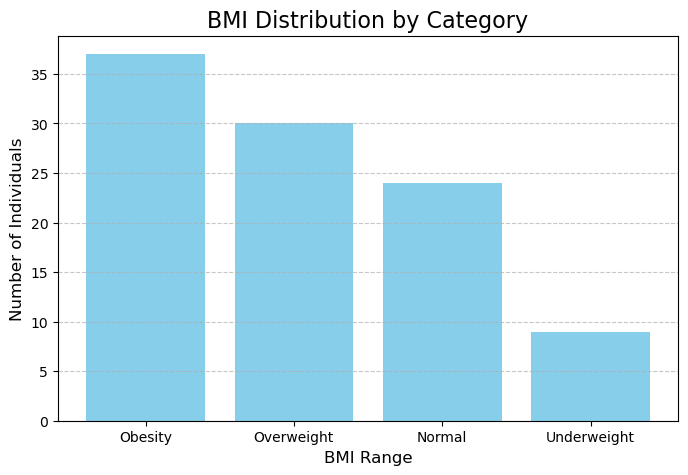

In [38]:
# Check for 'bmi_range' column
if 'bmi_range' in bmi_data.columns:
    # Plot 1: BMI Distribution by Category
    bmi_counts = bmi_data['bmi_range'].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(bmi_counts.index, bmi_counts.values, color='skyblue')
    plt.title('BMI Distribution by Category', fontsize=16)
    plt.xlabel('BMI Range', fontsize=12)
    plt.ylabel('Number of Individuals', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'bmi_range' not found in the dataset.")


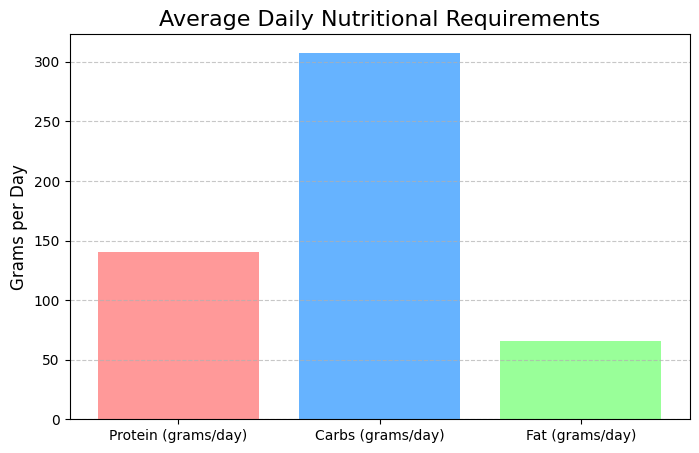

In [99]:
# Plot 2: Daily Nutritional Requirements
categories = ['Protein (grams/day)', 'Carbs (grams/day)', 'Fat (grams/day)']
valid_categories = [col for col in categories if col in bmi_data.columns]
if valid_categories:
    mean_values = bmi_data[valid_categories].mean()

    plt.figure(figsize=(8, 5))
    plt.bar(mean_values.index, mean_values.values, color=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title('Average Daily Nutritional Requirements', fontsize=16)
    plt.ylabel('Grams per Day', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No valid nutritional requirement columns found in the dataset.")

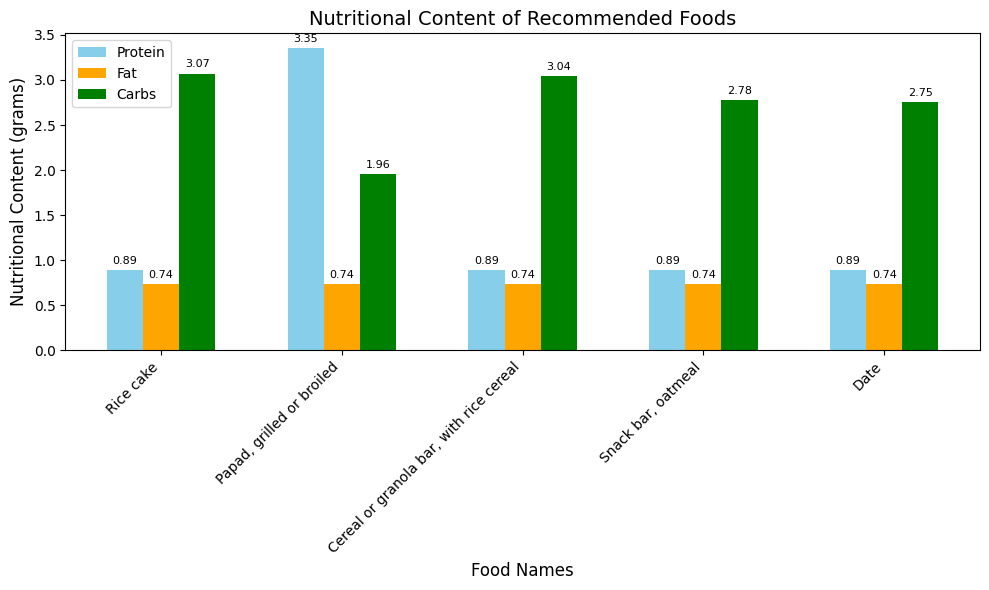

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `sample_recommendations` is the DataFrame shown in the image
# Extract data
food_names = sample_recommendations['food_name']
protein = sample_recommendations['protein']
fat = sample_recommendations['fat']
carbs = sample_recommendations['carbs']

# Bar chart to visualize Protein, Fat, and Carbs content
x = np.arange(len(food_names))  # Food indices
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, protein, width, label='Protein', color='skyblue')
bars2 = ax.bar(x, fat, width, label='Fat', color='orange')
bars3 = ax.bar(x + width, carbs, width, label='Carbs', color='green')

# Adding labels and title
ax.set_xlabel('Food Names', fontsize=12)
ax.set_ylabel('Nutritional Content (grams)', fontsize=12)
ax.set_title('Nutritional Content of Recommended Foods', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(food_names, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adding value labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

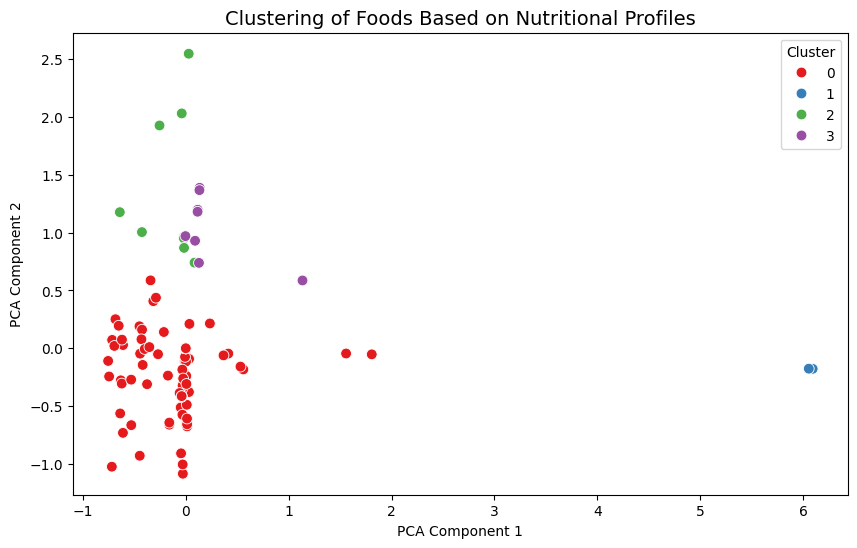

In [119]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
input_features_cleaned = input_features[['proteing', 'total_lipid_fatg', 'carbohydrate,_by_differenceg']].dropna()
kmeans.fit(input_features_cleaned)
clusters = kmeans.labels_

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(input_features_cleaned)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="Set1", s=60)
plt.title("Clustering of Foods Based on Nutritional Profiles", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

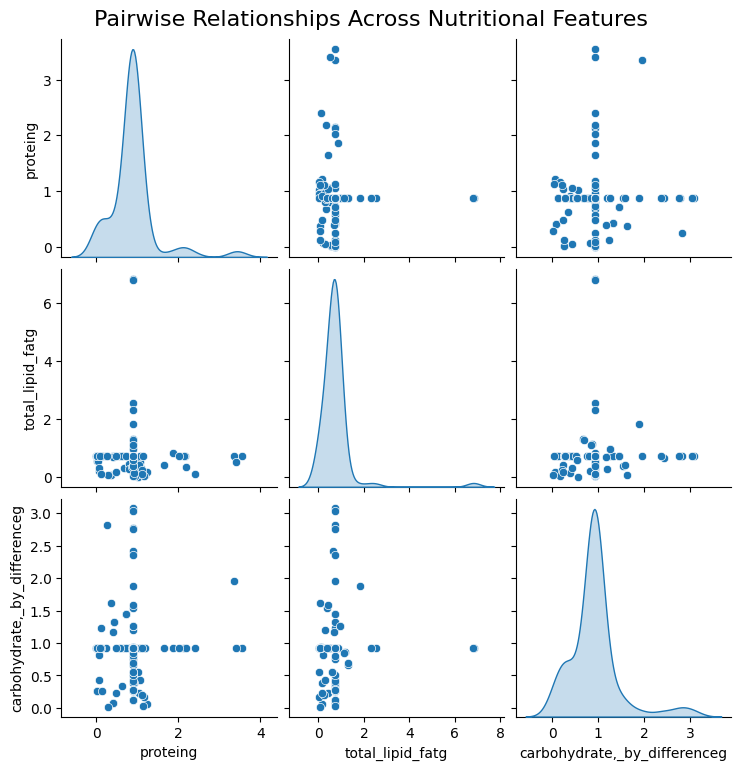

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for protein, fat, carbs, and water
sns.pairplot(input_features[['proteing', 'total_lipid_fatg', 'carbohydrate,_by_differenceg']].dropna(), 
             diag_kind="kde", 
             kind="scatter", 
             height=2.5)
plt.suptitle("Pairwise Relationships Across Nutritional Features", y=1.02, fontsize=16)
plt.show()

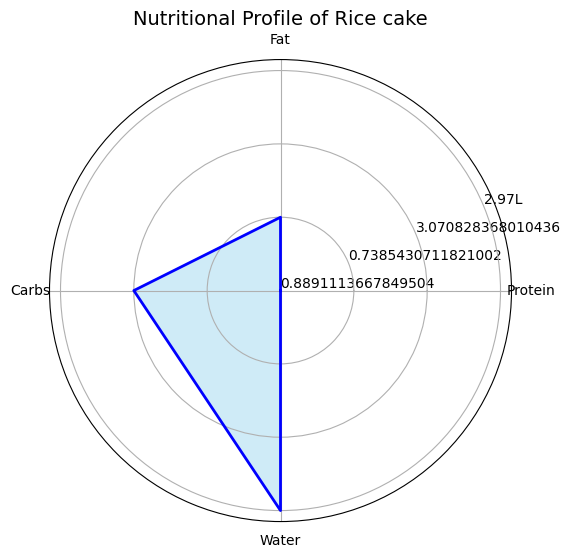

In [111]:
from math import pi

# Select one food for visualization
food_data = sample_recommendations.iloc[0][['protein', 'fat', 'carbs', 'water']]

# Radar chart setup
categories = ['Protein', 'Fat', 'Carbs', 'Water']
values = food_data.values.tolist()
values += values[:1]  # Close the radar chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title(f"Nutritional Profile of {sample_recommendations.iloc[0]['food_name']}", fontsize=14)
plt.show()

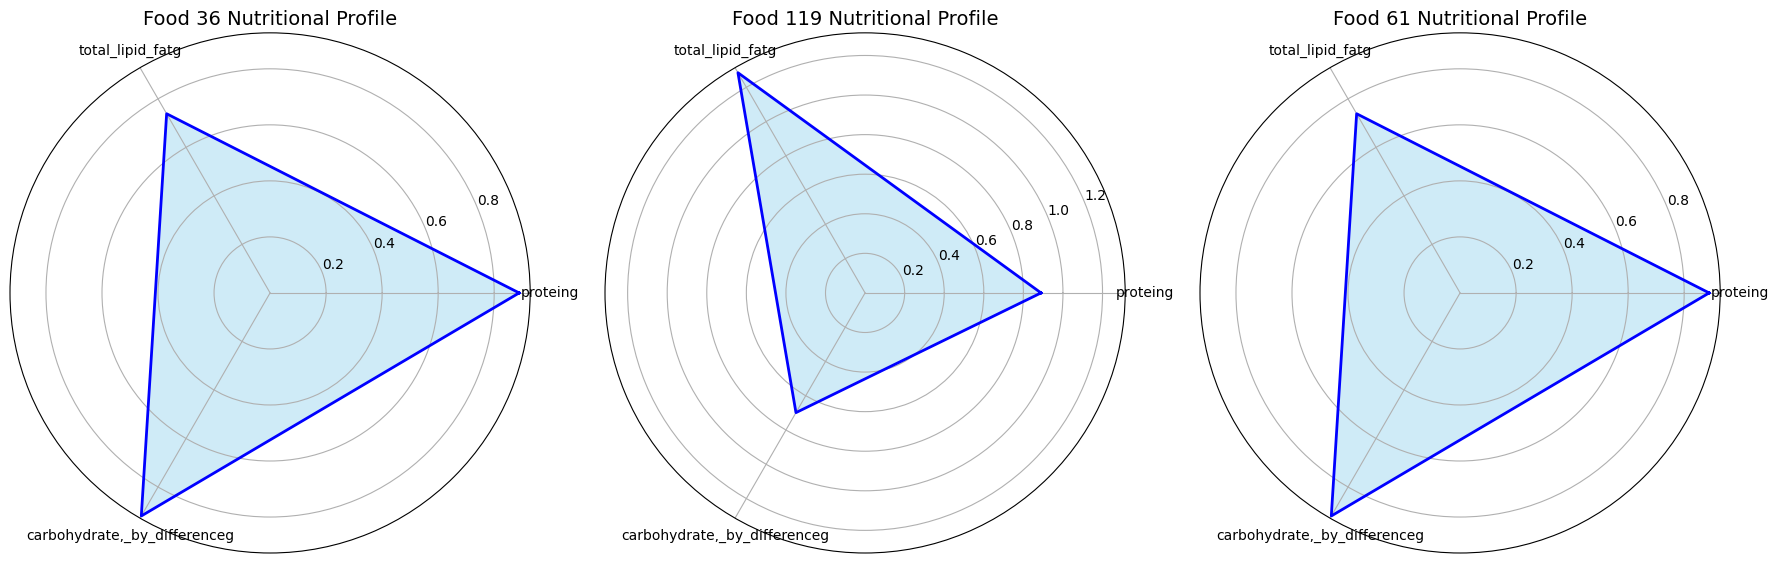

In [121]:
from math import pi

# Select multiple foods for visualization
selected_data = input_features.sample(3)  # Randomly sample 3 foods
categories = ['proteing', 'total_lipid_fatg', 'carbohydrate,_by_differenceg']

# Create radar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
for i, (idx, row) in enumerate(selected_data.iterrows()):
    values = row[categories].values.tolist()
    values += values[:1]  # Close the radar chart
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax = axes[i]
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f"Food {idx} Nutritional Profile", fontsize=14)

plt.tight_layout()
plt.show()

# KNN MODEL 2

In [30]:
# Load the dataset
file_path = 'C:\\Chinmay\\Machine_Learning\\chain\\Food_data_generated_with_dietIDs.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [31]:
X = data[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']]
y = data['Food_name']

In [32]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = data[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']]
    
# Scale the features (important for nearest neighbor)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [34]:
# Step 4: Train model using KNN instead of Random Forest
# Using KNN for multiple output regression
# The n_neighbors parameter can be tuned  
model = NearestNeighbors(n_neighbors=5)
model.fit(scaled_features)

NearestNeighbors()

In [35]:
input_data = [[protein, fat, carbs]]  # Example input (Protein, Fat, Carbs)
distances, indices = model.kneighbors(input_data)

In [36]:
# Step 5: Evaluate model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model using indices and distances score
    """
    # Print results
    print("Nearest Neighbors (Indexes):", indices)
    print("Distances to Neighbors:", distances)

In [37]:
evaluate_model(model, X_test, y_test)

Nearest Neighbors (Indexes): [[ 32  52 137 136 135]]
Distances to Neighbors: [[294.30135717 294.65681686 294.78702852 294.89402808 294.91709403]]


In [38]:
import joblib

# Save the trained NearestNeighbors model
model_filename = "chatbot-model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as chatbot-model.pkl


In [ ]:
def recommend_diet_plan(protein_target, fat_target, carbs_target, data, top_n=3):
    # Extract relevant columns
    food_items = data[['Food_name', 'Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']].dropna()

    # Rename columns for ease
    food_items.columns = ["food_name", "protein", "fat", "carbs"]

    # Convert to numpy array for faster computation
    food_array = food_items[["protein", "fat", "carbs"]].values
    food_names = food_items["food_name"].values

    best_combinations = []

    for _ in range(top_n):  # Generate multiple different meal plans
        selected_indices = []
        current_protein, current_fat, current_carbs = 0, 0, 0
        meal_plan = []

        while (current_protein < protein_target or current_fat < fat_target or current_carbs < carbs_target) and len(meal_plan) < 5:
            idx = random.randint(0, len(food_array) - 1)

            # Prevent selecting the same food repeatedly
            if idx in selected_indices:
                continue

            selected_indices.append(idx)
            meal_plan.append({
                "food_name": food_names[idx],
                "protein": food_array[idx][0],
                "fat": food_array[idx][1],
                "carbs": food_array[idx][2]
            })

            # Update macro totals
            current_protein += food_array[idx][0]
            current_fat += food_array[idx][1]
            current_carbs += food_array[idx][2]

            # Stop if we reach the macro targets or 5 items
            if (current_protein >= protein_target and current_fat >= fat_target and current_carbs >= carbs_target) or len(meal_plan) == 5:
                best_combinations.append({
                    "meals": meal_plan,
                    "total_protein": current_protein,
                    "total_fat": current_fat,
                    "total_carbs": current_carbs,
                    "recommendation": "Balanced meal based on your macro needs!"
                })
                break  # Move to the next diet plan

    return best_combinations

In [42]:
recommendations = recommend_diet_plan(protein, fat, carbs, data, top_n=3)
print(recommendations)

[{'food_name': 'Rice cake', 'protein': 7.1, 'fat': 4.3, 'carbs': 81.1}, {'food_name': 'Banana chips', 'protein': 2.3, 'fat': 33.6, 'carbs': 58.4}, {'food_name': 'Cookie, oatmeal', 'protein': 6.2, 'fat': 18.1, 'carbs': 68.7}]


In [44]:
# Example macro target
protein_target = 69
fat_target = 50
carbs_target = 65

recommended_foods = recommend_diet_plan(protein_target, fat_target, carbs_target, data)
print(recommended_foods)

[{'food_name': 'Papad, grilled or broiled', 'protein': 25.6, 'fat': 3.25, 'carbs': 59.9}, {'food_name': 'Fish, salmon, grilled', 'protein': 25.9, 'fat': 16.5, 'carbs': 0.0}, {'food_name': 'Fish, salmon, fried', 'protein': 17.4, 'fat': 20.7, 'carbs': 11.7}]
